In [1]:
import numpy as np
import os
import pandas as pd
# plotting specifications
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.cm import ScalarMappable
from cycler import cycler
mpl.rcParams.update({'font.size': 14})
plt.rcParams['axes.axisbelow'] = True
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
color_names = ['blue', 'red', 'green', 'black', 'magenta', 'y', 'slategray', 'darkorange']
mpl.rcParams['axes.prop_cycle'] = cycler(color=color_names)
pd.set_option('display.max_columns', None)
%matplotlib widget
from drl_grams import *

# N-gramas para control dinámico

## N = 13

In [2]:
n13_ga_loc_actions = uniformize_data('ga',**{'directory': 'resultados/n13stats_ga_lbv11/n13_stats_lbv11_1/', 'n':13})
n13_ga_acc_actions = uniformize_data('ga',**{'directory': 'resultados/n13stats_ga_acc/n13_stats_acc_1/', 'n':13})

for i in [2,3,4,5]:
    n13_ga_loc_actions = np.vstack((n13_ga_loc_actions, uniformize_data('ga',**{'directory': f'resultados/n13stats_ga_lbv11/n13_stats_lbv11_{i}/', 'n':13})))
    n13_ga_acc_actions = np.vstack((n13_ga_acc_actions, uniformize_data('ga',**{'directory': f'resultados/n13stats_ga_acc/n13_stats_acc_{i}/', 'n':13})))

n13_zhang_per_all = uniformize_data('zhang',**{'file': 'resultados/n13stats_per_16_acciones/experiment_0_n13_per_size120/success_action_sequences.dat'})
n13_zhang_per_best = uniformize_data('zhang',**{'file': 'resultados/n13stats_per_16_acciones/experiment_0_n13_per_size120/best_action_sequences.dat'})


for i in [1,2,3,4,5,6,7,8,9,10,11]:
    n13_zhang_per_all = np.vstack((n13_zhang_per_all, uniformize_data('zhang',**{'file' : f'resultados/n13stats_per_16_acciones/experiment_{i}_n13_per_size120/success_action_sequences.dat'})))
    n13_zhang_per_best = np.vstack((n13_zhang_per_best, uniformize_data('zhang',**{'file' : f'resultados/n13stats_per_16_acciones/experiment_{i}_n13_per_size120/best_action_sequences.dat'})))


In [3]:
action_arrays = [n13_ga_acc_actions,n13_ga_loc_actions,n13_zhang_per_all,n13_zhang_per_best]
titles = ['Genetic Algorithm, accumulative fitness', 'Genetic Algorithm, loc. based fitness', 'Fid > 90 (DRL PER)', 'Top 10 (DRL PER)' ]

Total n-grams: 32500, Shown: 32500


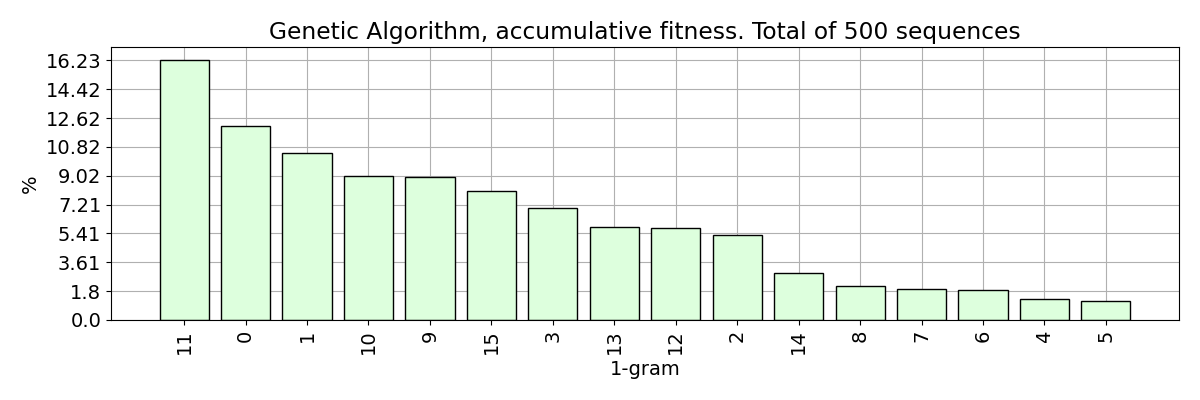

Total n-grams: 32500, Shown: 32500


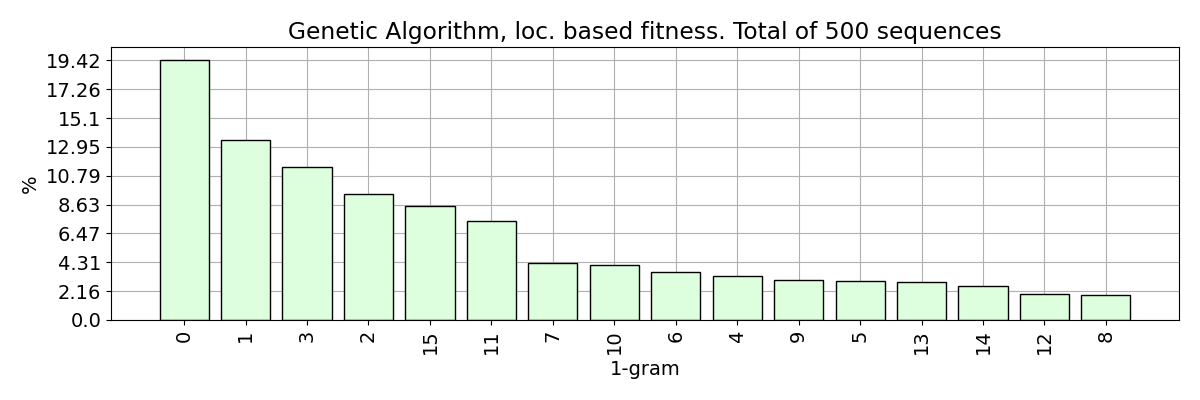

Total n-grams: 1820780, Shown: 1820780


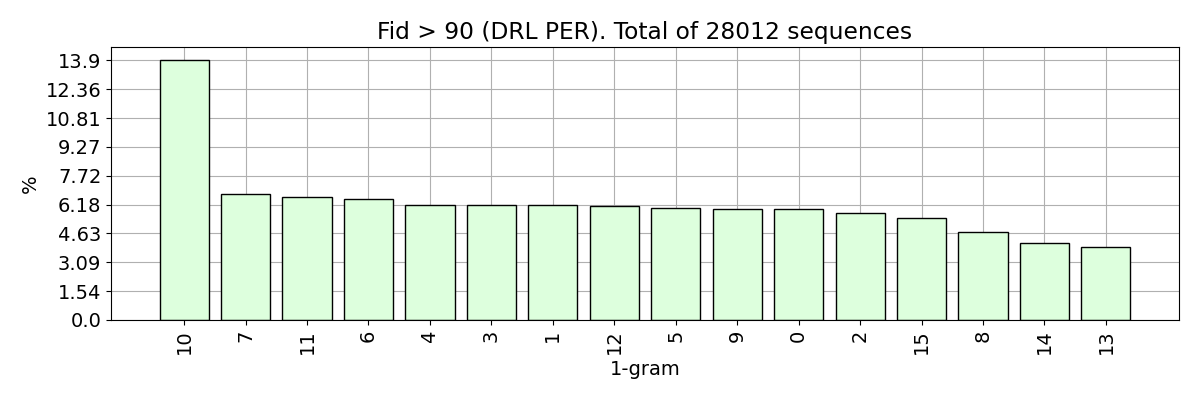

Total n-grams: 7800, Shown: 7800


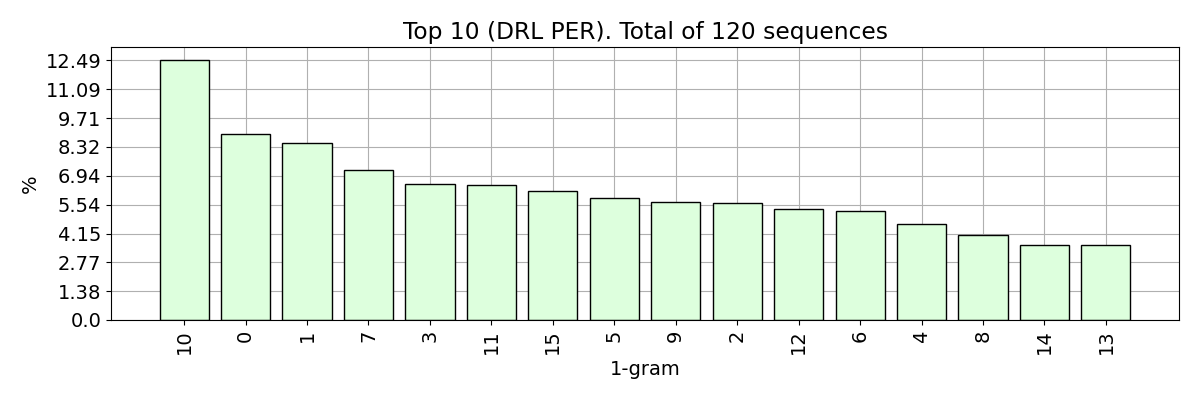

In [4]:
for array, title in zip(action_arrays, titles):
    ngram(array, title, n=1)


Total n-grams: 32000, Shown: 19968


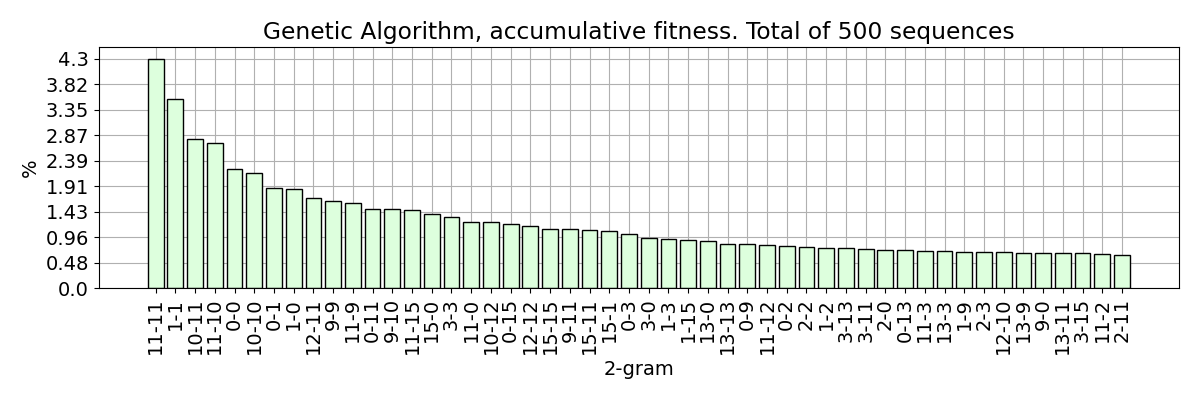

Total n-grams: 32000, Shown: 19948


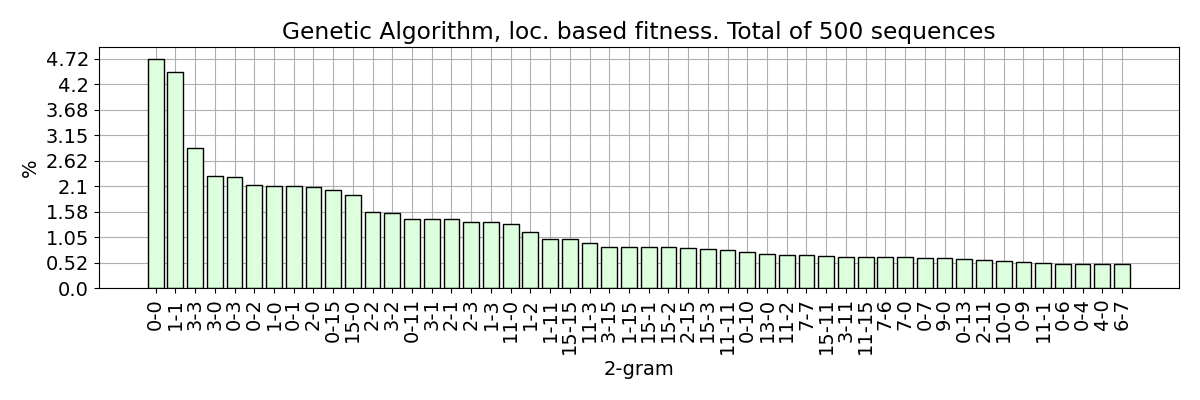

Total n-grams: 1792768, Shown: 1379381


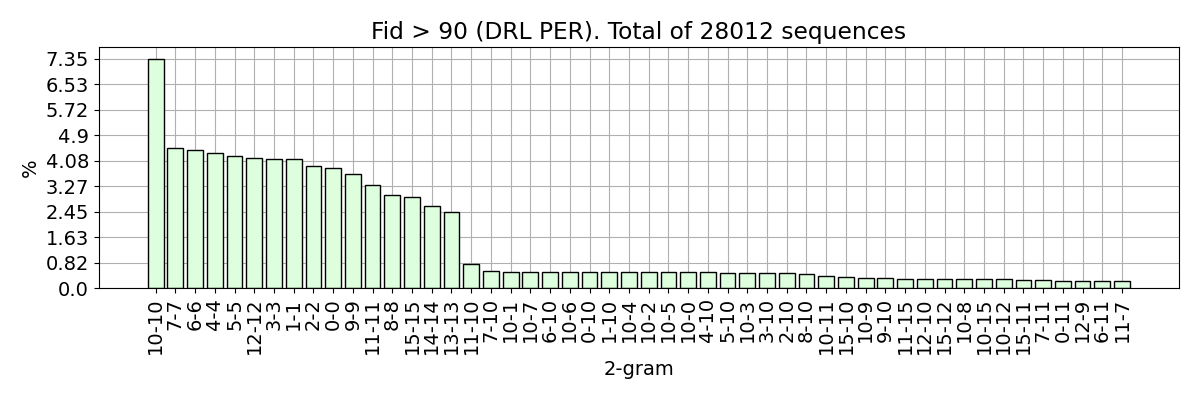

Total n-grams: 7680, Shown: 5867


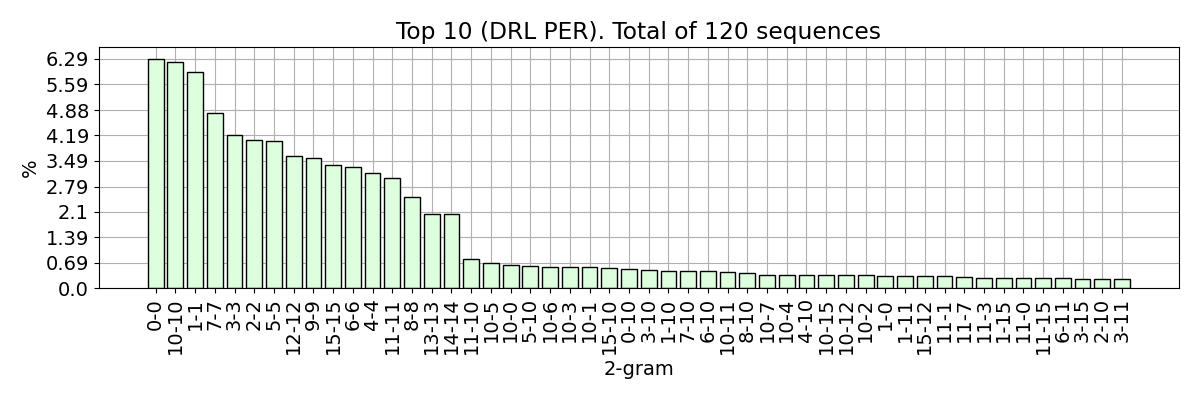

In [5]:
for array, title in zip(action_arrays, titles):
    ngram(array, title, n=2)


Total n-grams: 30500, Shown: 1798


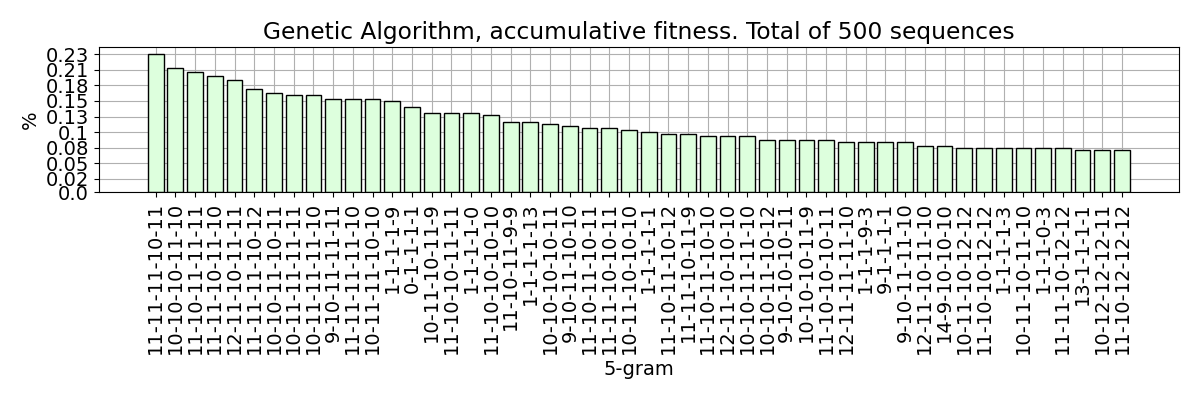

Total n-grams: 30500, Shown: 1702


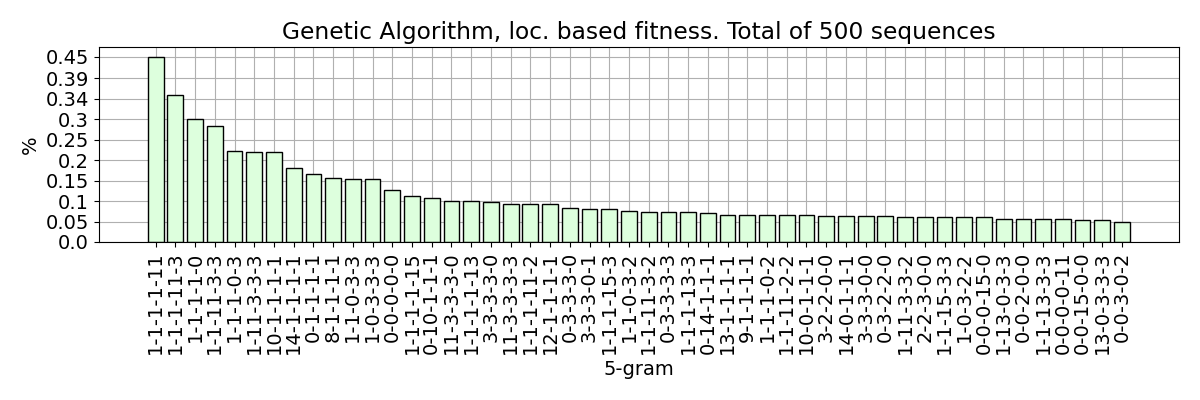

Total n-grams: 1708732, Shown: 453883


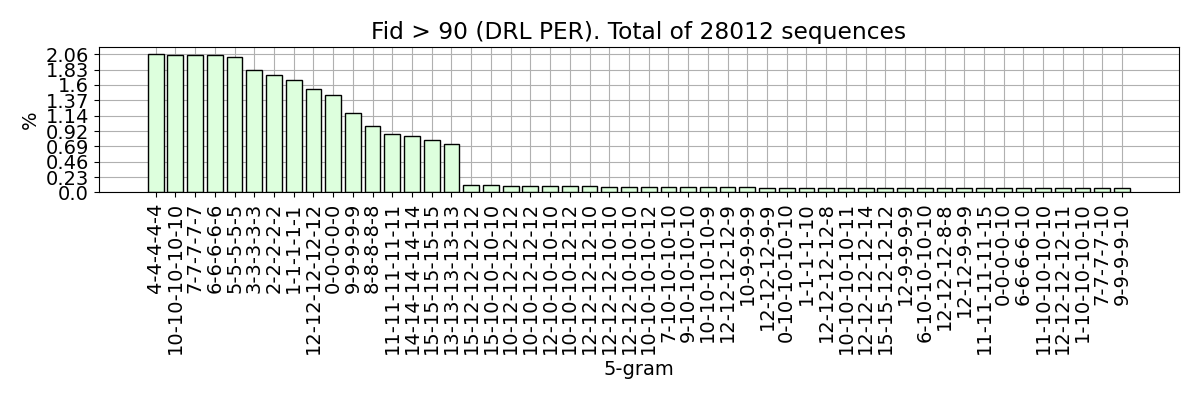

Total n-grams: 7320, Shown: 1900


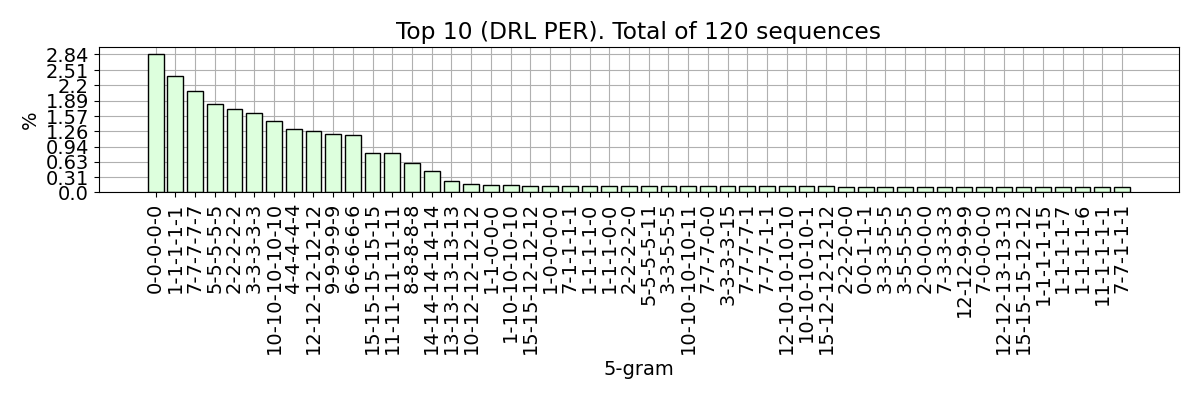

In [6]:
for array, title in zip(action_arrays, titles):
    ngram(array, title, n=5)


/home/sofi/Documents/codigos/dynamic_analysis/drl_grams.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure, ax = plt.subplots(figsize=(12, 4))


Total n-grams: 31500, Shown: 7664


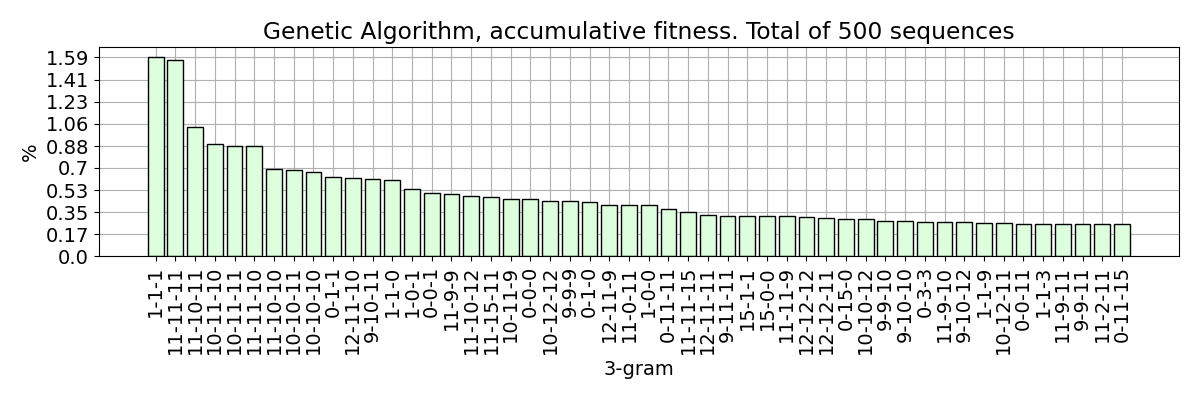

Total n-grams: 19000, Shown: 6091


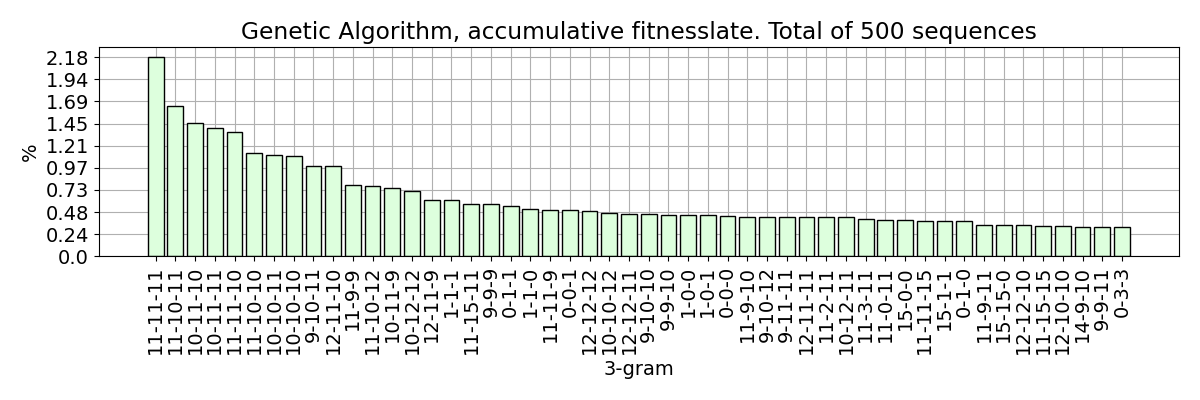

Total n-grams: 31500, Shown: 7607


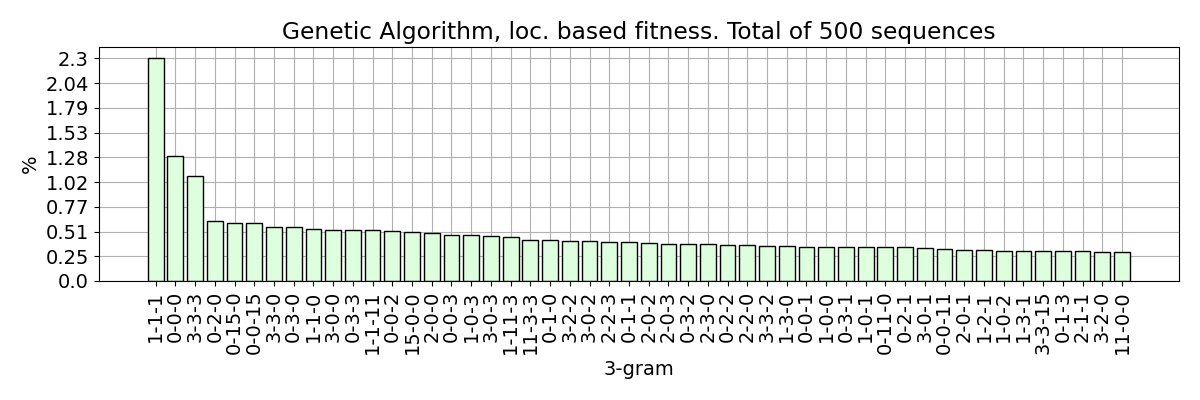

Total n-grams: 19000, Shown: 4830


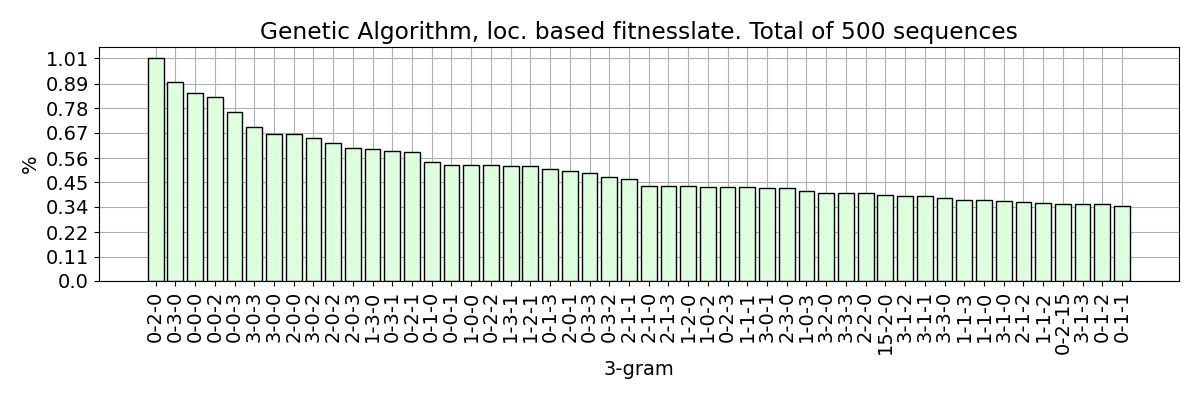

Total n-grams: 1764756, Shown: 905509


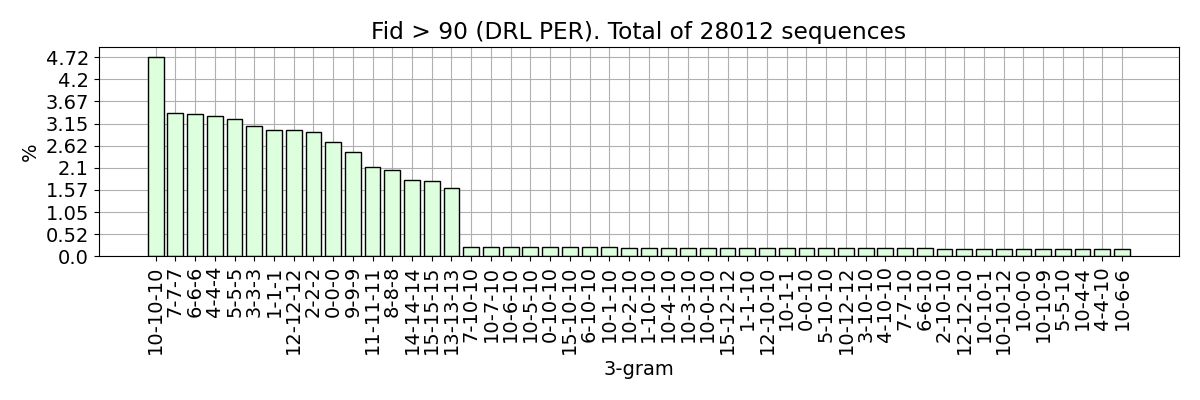

Total n-grams: 1064456, Shown: 580750


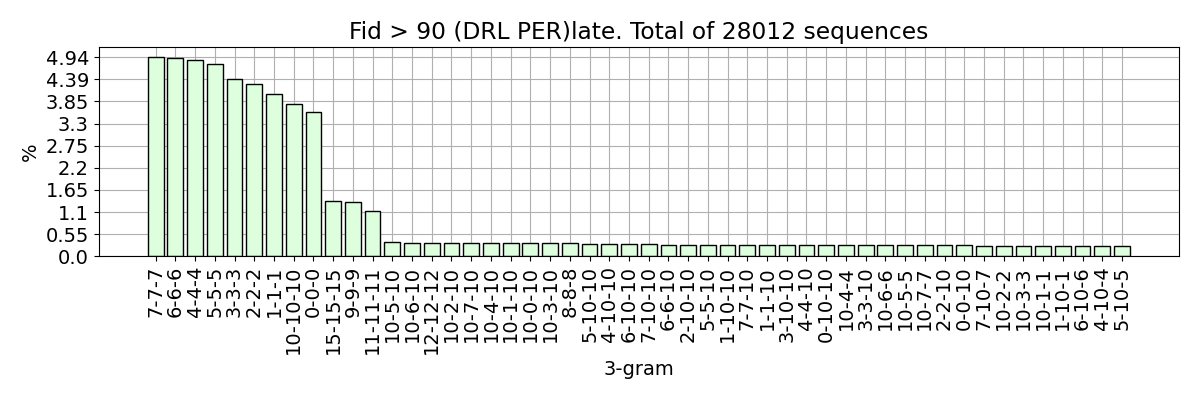

Total n-grams: 7560, Shown: 3822


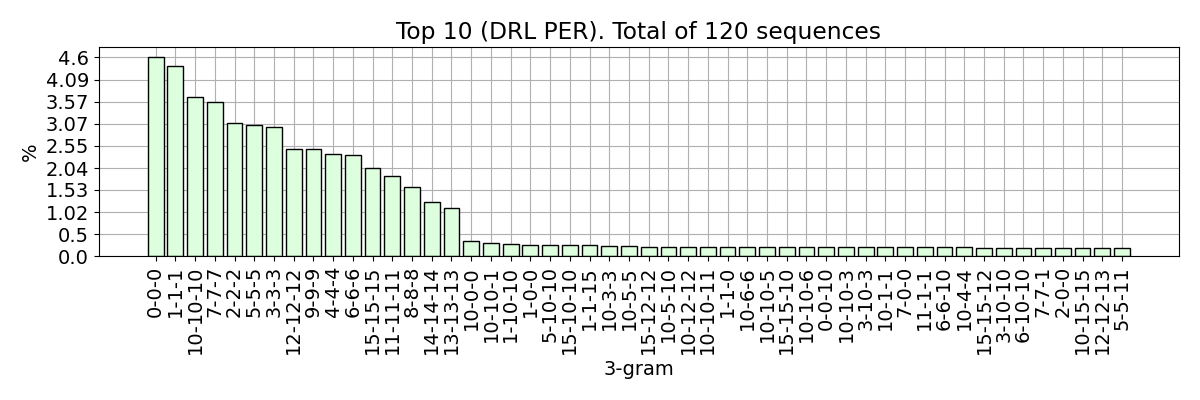

Total n-grams: 4560, Shown: 2541


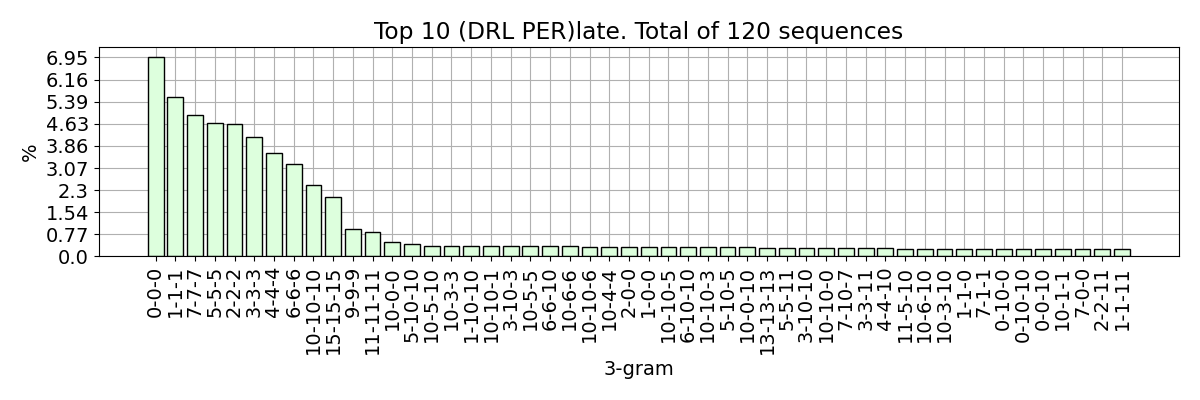

In [8]:
action_arrays_trimmed = [array[:, 25:] for array in action_arrays]
for array, array_trimmed, title in zip(action_arrays,action_arrays_trimmed, titles):
    ngram(array, title, n=3)
    ngram(array_trimmed, title + 'late', n=3)


In [ ]:
action_arrays_trimmed = [array[:, 25:] for array in action_arrays]
for array, array_trimmed, title in zip(action_arrays,action_arrays_trimmed, titles):
    ngram(array, title, n=3)
    ngram(array_trimmed, title + 'late', n=3)
